# Project Final Submission Template

You must sign up for a canvas Project Group on the People page even if you're working alone.

Student 1: Darian Tham

Student 2:
    
Canvas Project Group Number: 323

### Step 1a: Planning 
#### Identify the information in the file your program will read

Double click this cell to edit.

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

Information in the video game file:
 - Certain video games sold globally
 - For each video game, its rank (in terms of highest global sales), name, platform, year, genre, publisher, NA (North American) sales, EU (European Union) sales, JP (Japan) sales, other sales, and global sales
 
Notes:
 - For some video games, the year is not available (N/A) (this information is not accessed in the function)

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

Double click this cell to edit.

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

Possible program outputs
- Average number of games per publisher (bar graph)
- Sum of total number of games released each year (line graph)
- Average profit (in millions) per game for each publisher inputed (a total of any 5 publishers within the csv file)(bar graph)

Selected idea: Average profit (in millions) per game for each publisher
- I am doing a bar graph for the avearge profit in millions per game for each publisher inputed 

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

Double click this cell to edit. 

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

expect(main('video_game_sample_graph_data.csv'), None)

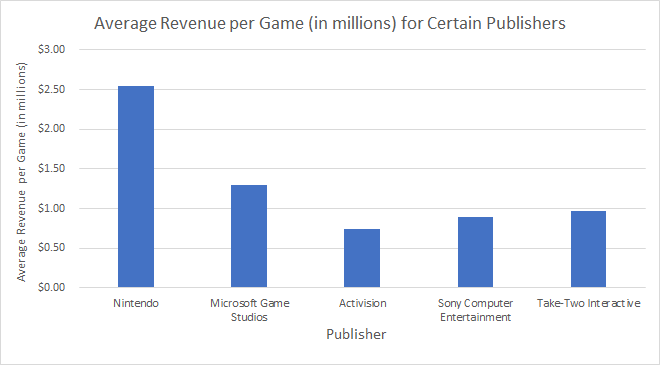

### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

Double click this cell to edit.

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

For each certain video game sold globally, we need to know its publisher and the global amount of sales. I need these two pieces of information because I plan to find and plot on a bar graph the average profit (in millions) per game for each publisher that is inputed (a total of any 5 publishers within the csv file).  

In [2]:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as plt
##################
# Data Definitions

VideoGame = NamedTuple('VideoGame', [('publisher', str),
                                     ('global_sales', float)])  # in millions, in range[0, ...)

# interp. a video game with the name of its publisher and the amount of global sales 

VG1 = VideoGame('Nintendo', 82.74)
VG2 = VideoGame('Nintendo', 40.24)
VG3 = VideoGame('Nintendo', 35.82)
VG4 = VideoGame('Microsoft Game Studios', 21.82)
VG5 = VideoGame('Activision', 14.64)
VG6 = VideoGame('Take-Two Interactive', 21.4)
VG7 = VideoGame('505 Games', 3.61)
VG8 = VideoGame('Sega', 8.06)
VG9 = VideoGame('Capcom', 6.3)
VG10 = VideoGame('GT Interactive', 6.27)


# template based on Compound
@typecheck
def fn_for_video_game(vg: VideoGame) -> ...:
    return ...(vg.publisher,
               vg.global_sales)

# List[VideoGame]
# interp. a list of video games

LOVG0 = []
LOVG1 = [VG1, VG2, VG3, VG4, VG5, VG6, VG7, VG8, VG9, VG10]

# template based on arbitary-sized and reference rule
@typecheck
def fn_for_lovg(lovg: List[VideoGame]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for vg in lovg:
        ...(fn_for_video_game(vg), acc)
    
    return acc

<>:28: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:43: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:28: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:43: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<ipython-input-2-bc8be708787d>:28: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return ...(vg.publisher,
<ipython-input-2-bc8be708787d>:43: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  ...(fn_for_video_game(vg), acc)


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
2 of 2 tests passed
1 of 1 tests passed


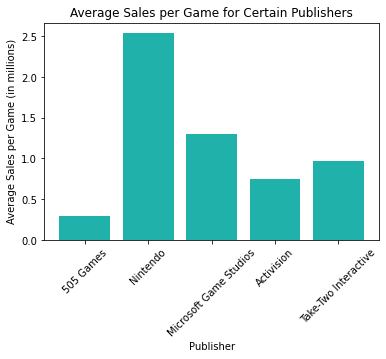

In [3]:
###########
# Functions

@typecheck
def read(filename: str) -> List[VideoGame]:
    """    
    reads information from the specified file and returns a list of VideoGame data
    """
    # return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Consumed]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        lovg = []
        next(reader) # skip header line

        for row in reader:
            vg = VideoGame(row[5],                 # just a str    
                           parse_float(row[10]))   # represents a float [0.00, ...) 
            lovg.append(vg)
    
    return lovg

start_testing()

# examples and tests for read
expect(read('video_game_information_test1.csv'), [VG1, VG2, VG3])
expect(read('video_game_information_test2.csv'), [VideoGame('Capcom', 4.87),
                                                  VideoGame('Nintendo', 4.85),
                                                  VideoGame('Sony Computer Entertainment', 4.84)])      
summary()


def filter_publisher(vg: VideoGame, publisher: str) -> bool:
    """
    filter by each publisher in the list from read
    """
    # return True # stub
    # template based on VideoGame, with additional parameter string
    return vg.publisher == publisher

start_testing()

# examples and tests for filter_publisher
expect(filter_publisher(VG1, 'Nintendo'), True)
expect(filter_publisher(VG2, 'Capcom'), False)

summary()

def calc_avg_per_publisher(lovg: List[VideoGame], publisher: str) -> float:
    """
    calculate the average sales per game for each publisher
    """
    # return 0.0 #stub
    # template based on List[VideoGame], with addtional parameter string
    # two accumulators, sum and tally
    # sum stores the total amount of sales for video games 
    # tally stores the number of games per publisher so far
    sum = 0.0   # type: float
    tally = 0   # type: int 
    for vg in lovg:
        if filter_publisher(vg, publisher):
            sum = sum + vg.global_sales
            tally = tally + 1
    if len(lovg) == 0:
        return 0
    else:
        return sum/tally

start_testing()

# examples and tests for calculate_average_per_publisher
expect(calc_avg_per_publisher([], ''), 0)
expect(calc_avg_per_publisher([VG1], "Nintendo"), 82.74)
expect(calc_avg_per_publisher([VG1, VG3], "Nintendo"), 59.28)

summary()

def list_of_averages(lovg: List[VideoGame], publisher1: str, publisher2: str, publisher3: str, publisher4: str, publisher5: str) -> List[float]:
    # return [] #stub
    # template based on List[VideoGame] with 5 addtional string parameters
    """
    produces a list of calculated averages
    """
    avg1 = calc_avg_per_publisher(lovg, publisher1)
    avg2 = calc_avg_per_publisher(lovg, publisher2)
    avg3 = calc_avg_per_publisher(lovg, publisher3)
    avg4 = calc_avg_per_publisher(lovg, publisher4)
    avg5 = calc_avg_per_publisher(lovg, publisher5)
    return [avg1, avg2, avg3, avg4, avg5]
    
start_testing()

# examples and tests for list_of_averages
expect(list_of_averages([], '', '', '', '', ''), [0, 0, 0, 0, 0])
expect(list_of_averages([VG8, VG7, VG9, VG10, VG6], 'Sega', '505 Games', 'Capcom', 'GT Interactive', 'Take-Two Interactive'), [8.06, 3.61, 6.3, 6.27, 21.4])

summary()

def bar_graph(lof: List[float], publisher1: str, publisher2: str, publisher3: str, publisher4: str, publisher5: str) -> None:
    # return None #stub
    # template based on List[float] with five additional string parameters
    """
    creates a function that graphs the list of calculated averages
    """
    x_values = [publisher1, publisher2, publisher3, publisher4, publisher5]
    y_values = lof
    bar_width = 0.8
    plt.bar(x_values, y_values, bar_width, color='lightseagreen')
    plt.xlabel('Publisher')
    plt.ylabel('Average Sales per Game (in millions)')
    plt.title("Average Sales per Game for Certain Publishers")
    plt.xticks(rotation=45)
    plt.show
    return None

start_testing()

# examples and tests for bar_graph
expect(bar_graph([0.29, 2.54, 1.3, 0.75, 0.97],'505 Games', 'Nintendo', 'Microsoft Game Studios', 'Activision', 'Take-Two Interactive'), None)


summary()
    
def main(filename: str, publisher1: str, publisher2: str, publisher3: str, publisher4: str, publisher5: str) -> None:
    """
    produces a graph of the averages for each inputed publisher
    """
    # return None #stub
    # template based on composition
    return bar_graph(list_of_averages(read(filename), publisher1, publisher2, publisher3, publisher4, publisher5), publisher1, publisher2, publisher3, publisher4, publisher5)
    
# tests for the main function are in seperate cells below


1 of 1 tests passed


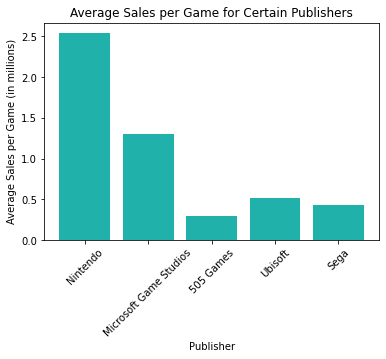

In [4]:
start_testing()

# examples and tests for main
expect(main('global_video_game_sales_in_millions.csv', 'Nintendo', 'Microsoft Game Studios', '505 Games', 'Ubisoft', 'Sega'), None)

summary()

1 of 1 tests passed


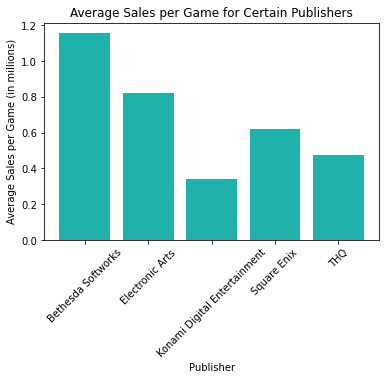

In [6]:
start_testing()

# additional examples and tests for main
expect(main('global_video_game_sales_in_millions.csv', 'Bethesda Softworks', 'Electronic Arts', 'Konami Digital Entertainment', 'Square Enix', 'THQ'), None)

summary()

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

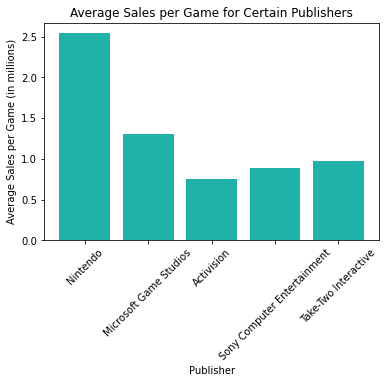

In [61]:
main('global_video_game_sales_in_millions.csv', 'Nintendo', 'Microsoft Game Studios', 'Activision', 'Sony Computer Entertainment', 'Take-Two Interactive')

In [62]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 53525
ASSIGNMENT = 596984 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_m…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')